# 1. 기본적인 오토인코더 구현 실습(MNIST)

## 라이브러리 불러오기

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import v2

## 데이터 불러오기

In [4]:
# train_dataset = datasets.MNIST(
#     root='./mnist',
#     train=True,
#     download=True,
# )

# test_dataset = datasets.MNIST(
#     root='./mnist',
#     train=False,
#     download=True,
# )

In [5]:
train_dataset = datasets.FashionMNIST(
    root='./fmnist',
    train=True,
    download=True,
)

test_dataset = datasets.FashionMNIST(
    root='./fmnist',
    train=False,
    download=True,
)

In [6]:
print(f'학습 데이터 개수: {len(train_dataset)}')
print(f'테스트 데이터 개수: {len(test_dataset)}')

학습 데이터 개수: 60000
테스트 데이터 개수: 10000


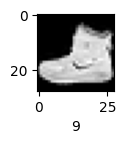

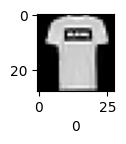

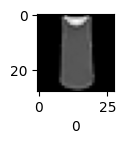

In [7]:
def visualize_data(image, label):
    class_names = range(10)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap='gray')
    plt.xlabel(class_names[label])
    plt.show()

for i in range(3):
	image = train_dataset[i][0]
	label = train_dataset[i][1]
	visualize_data(image, label)

In [8]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [9]:
image, label = train_dataset[0]
print(np.array(image))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

## 기본 전처리 후 데이터 불러오기

In [10]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
    ]
)

In [11]:
# train_dataset = datasets.MNIST(
#     root='./mnist',
#     train=True,
#     download=True,
#     transform=transforms,
# )

# test_dataset = datasets.MNIST(
#     root='./mnist',
#     train=False,
#     download=True,
#     transform=transforms,
# )

In [12]:
train_dataset = datasets.FashionMNIST(
    root='./fmnist',
    train=True,
    download=True,
    transform=transforms,
)

test_dataset = datasets.FashionMNIST(
    root='./fmnist',
    train=False,
    download=True,
    transform=transforms,
)

In [13]:
image, label = train_dataset[0]
print(np.array(image))

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

## 모델 학습

### 데이터 분할

In [14]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, drop_last=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32)

### 모델 생성 및 학습

In [15]:
class BasicAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [16]:
model = BasicAutoencoder()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

BasicAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [18]:
# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, _ in train_dataloader:
        images = images.view(images.size(0), -1).to(device)  # 28x28 -> 784 벡터화
        outputs = model(images)
        loss = loss_fn(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_dataloader):.4f}")

Epoch [1/10], Loss: 0.0846
Epoch [2/10], Loss: 0.0421
Epoch [3/10], Loss: 0.0307
Epoch [4/10], Loss: 0.0258
Epoch [5/10], Loss: 0.0238
Epoch [6/10], Loss: 0.0228
Epoch [7/10], Loss: 0.0220
Epoch [8/10], Loss: 0.0212
Epoch [9/10], Loss: 0.0204
Epoch [10/10], Loss: 0.0196


### 모델 평가

In [19]:
# 테스트
model.eval()
with torch.no_grad():
    for images, _ in test_dataloader:
        images = images.view(images.size(0), -1).to(device)
        outputs = model(images)
        break

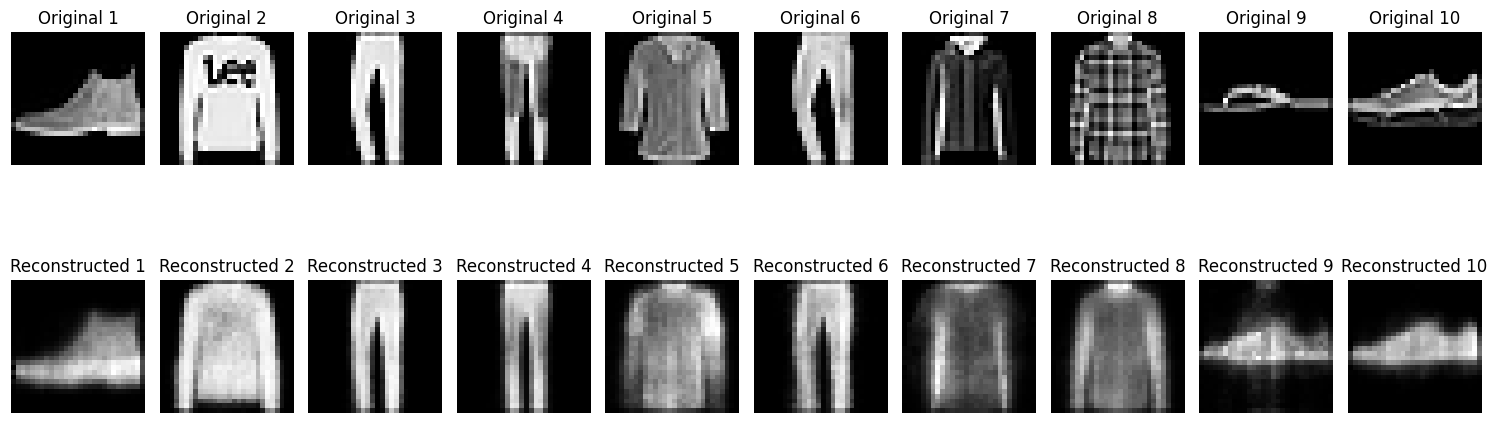

In [20]:
# 디코더 출력 결과에서 앞 10개 이미지를 시각화
images = images.view(-1, 28, 28)
outputs = outputs.view(-1, 28, 28)

fig, axes = plt.subplots(2, 10, figsize=(15, 6))  # 2행 10열의 서브플롯 생성

for i in range(10):  # 앞 10개 샘플만 출력
    # 원본 이미지
    axes[0, i].imshow(images[i].cpu().numpy(), cmap='gray')
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")

    # 복원된 이미지
    axes[1, i].imshow(outputs[i].cpu().numpy(), cmap='gray')
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

### 차원축소와 시각화

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import v2  # torchvision 0.14 이상에서 사용 가능

# 데이터 전처리 (버전 문제 시 transforms.ToTensor()로 대체 가능)
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(dtype=torch.float32, scale=True)
])

# MNIST 데이터셋 불러오기
train_dataset = datasets.MNIST(
    root='./mnist',
    train=True,
    download=True,
    transform=transform
)
test_dataset = datasets.MNIST(
    root='./mnist',
    train=False,
    download=True,
    transform=transform
)
# train_dataset = datasets.FashionMNIST(
#     root='./fmnist',
#     train=True,
#     download=True,
#     transform=transform
# )
# test_dataset = datasets.FashionMNIST(
#     root='./fmnist',
#     train=False,
#     download=True,
#     transform=transform
# )

train_dataloader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, drop_last=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

# 모델 정의: latent 차원을 3으로 설정
class Autoencoder3D(nn.Module):
    def __init__(self):
        super(Autoencoder3D, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)  # latent vector dimension = 3
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )
    def forward(self, x):
        latent = self.encoder(x)
        x_recon = self.decoder(latent)
        return x_recon

    # 별도로 latent 벡터를 추출할 수 있는 메서드 추가
    def encode(self, x):
        return self.encoder(x)

# 디바이스 설정
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Autoencoder3D().to(device)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 학습 루프
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, _ in train_dataloader:
        images = images.view(images.size(0), -1).to(device)  # flatten: 28x28 -> 784
        outputs = model(images)
        loss = loss_fn(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_dataloader):.4f}")


Epoch [1/10], Loss: 0.0993
Epoch [2/10], Loss: 0.0581
Epoch [3/10], Loss: 0.0435
Epoch [4/10], Loss: 0.0379
Epoch [5/10], Loss: 0.0361
Epoch [6/10], Loss: 0.0350
Epoch [7/10], Loss: 0.0339
Epoch [8/10], Loss: 0.0329
Epoch [9/10], Loss: 0.0320
Epoch [10/10], Loss: 0.0311


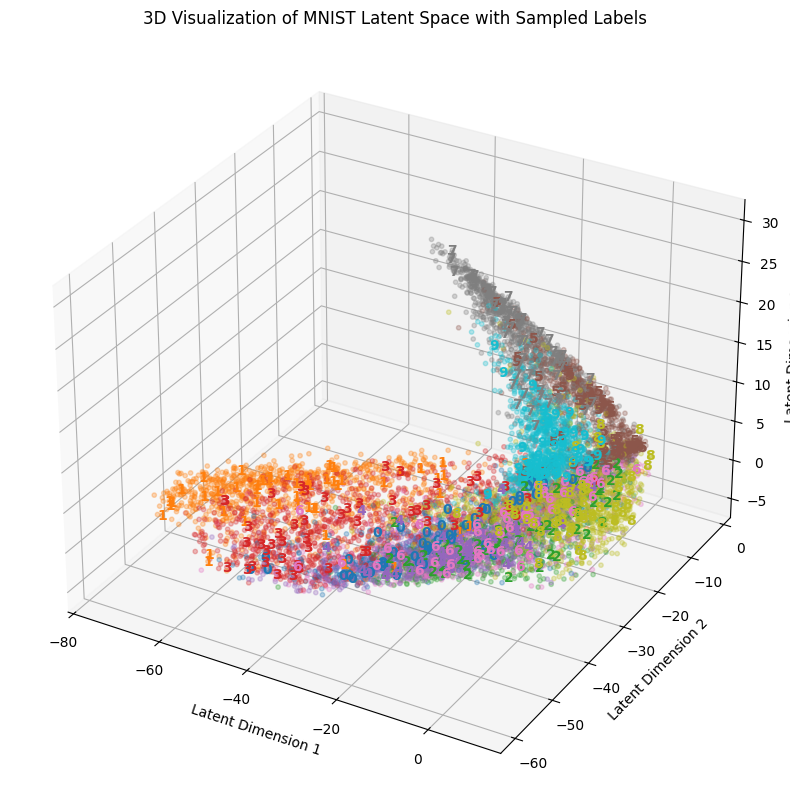

In [26]:
# latent 공간 시각화를 위한 데이터 추출
model.eval()
all_latents = []
all_labels = []
with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.view(images.size(0), -1).to(device)
        # latent 벡터만 추출 (model.encode() 사용)
        latent = model.encode(images)
        all_latents.append(latent.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_latents = np.concatenate(all_latents, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 3D 시각화: 전체 분포와 일부 샘플에 텍스트 어노테이션 추가
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 전체 latent 벡터에 대해 scatter plot (작은 크기와 낮은 불투명도로 분포 확인)
scatter = ax.scatter(all_latents[:, 0], all_latents[:, 1], all_latents[:, 2],
                     c=all_labels, cmap='tab10', s=10, alpha=0.3)

# 각 digit별로 일부 포인트만 선택하여 텍스트 어노테이션 추가
for digit in range(10):
    # 현재 클래스(digit)에 해당하는 인덱스 찾기
    indices = np.where(all_labels == digit)[0]
    # 전체 포인트 중 최대 50개를 무작위로 샘플링 (포인트가 50개 미만인 경우 전체 사용)
    sample_indices = np.random.choice(indices, size=min(50, len(indices)), replace=False)

    for idx in sample_indices:
        x, y, z = all_latents[idx, 0], all_latents[idx, 1], all_latents[idx, 2]
        ax.text(x, y, z, str(digit),
                color=plt.cm.tab10(digit),
                fontsize=10,
                fontweight='bold',
                ha='center', va='center')

ax.set_xlabel("Latent Dimension 1")
ax.set_ylabel("Latent Dimension 2")
ax.set_zlabel("Latent Dimension 3")
plt.title("3D Visualization of MNIST Latent Space with Sampled Labels")
plt.show()


In [27]:
import plotly.graph_objects as go
import numpy as np

# all_latents와 all_labels는 이전 코드에서 추출한 NumPy 배열이어야 합니다.
# 예시)
# all_latents.shape = (N, 3)
# all_labels.shape = (N,)

# 각 숫자(0~9)에 대한 색상 리스트 (Plotly 기본 색상 사용)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

fig = go.Figure()

for digit in np.unique(all_labels):
    # 현재 digit에 해당하는 인덱스 찾기
    indices = np.where(all_labels == digit)[0]
    # 각 클래스에서 최대 50개의 샘플 선택 (샘플이 적으면 모두 선택)
    sample_indices = np.random.choice(indices, size=min(50, len(indices)), replace=False)

    fig.add_trace(go.Scatter3d(
        x=all_latents[sample_indices, 0],
        y=all_latents[sample_indices, 1],
        z=all_latents[sample_indices, 2],
        mode='text',  # 마커 없이 텍스트만 표시
        text=[str(digit)] * len(sample_indices),
        textposition='middle center',
        textfont=dict(color=colors[int(digit)], size=12),
        name=f"Digit {digit}"
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Latent Dimension 1',
        yaxis_title='Latent Dimension 2',
        zaxis_title='Latent Dimension 3'
    ),
    width=800,
    margin=dict(r=20, l=10, b=10, t=10),
    title="3D Visualization of MNIST Latent Space (Text Labels)"
)

fig.show()
